### Q1) Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
#import liabraries
import pandas as pd
import seaborn as sns

In [4]:
#import data
Delivery_data=pd.read_csv('delivery_time.csv')
Delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
Delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
Delivery_data.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
Delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
Delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

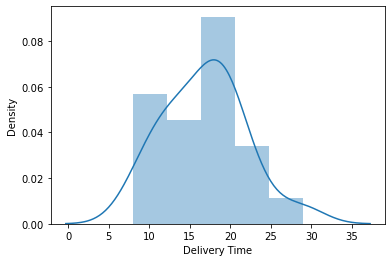

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(Delivery_data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

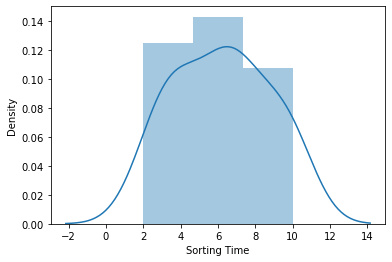

In [11]:
sns.distplot(Delivery_data['Sorting Time'])

In [12]:
# feature engineering
# Renaming Columns
Delivery_data=Delivery_data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
Delivery_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

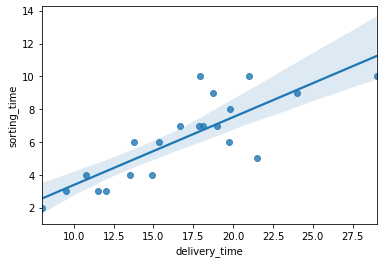

In [13]:
sns.regplot(x=Delivery_data['delivery_time'],y=Delivery_data['sorting_time'])

### Model building

In [15]:
import statsmodels.formula.api as smf

In [16]:
model=smf.ols("delivery_time~sorting_time",data=Delivery_data).fit()

### Model testing

In [17]:
# finding coefficient parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
# finding tvalue and pvalues
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
print('R2 score:',round(model.rsquared,4))
print('Adjusted R2 score:',round(model.rsquared_adj,4))

R2 score: 0.6823
Adjusted R2 score: 0.6655


### model prediction

In [20]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [22]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64